cuda


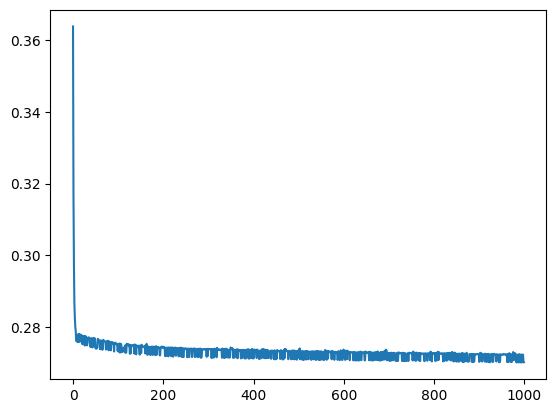

In [2]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0)

class XORProblem(nn.Module):
    def __init__(self):
        super(XORProblem, self).__init__()
        self.linear1 = nn.Linear(2,2,bias = True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1, bias = True)

    def forward(self,x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x


class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self,index):
        return self.x[index].to(device), self.y[index].to(device)

def criterion(model, train_data_loader, optimizer, loss_fn):
    total_loss = 0
    for data in train_data_loader:
        input, labels = data
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output.flatten(),labels)
        loss.backward()
        optimizer.step()
        total_loss +=loss.item()

    return total_loss/len(train_data_loader)

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

loss_list = []
full_dataset = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size = batch_size, shuffle = True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = XORProblem().to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =0.03)
epoch = 1000

for iter in range(epoch):
    model.train()
    avg_loss = criterion(model, train_data_loader, optimizer, loss_fn)
    loss_list.append(avg_loss)

plt.plot(loss_list)
plt.show()

cuda


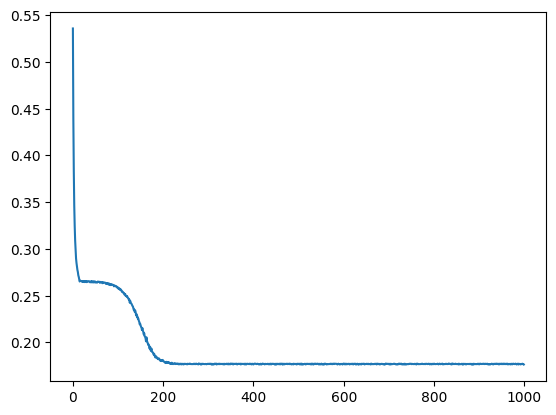

In [7]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

class XORProblem(nn.Module):
    def __init__(self):
        super(XORProblem,self).__init__()
        self.linear1 = nn.Linear(2,2,bias = True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2,1,bias = True)

    def forward(self,x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x


class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self,index):
        return self.x[index].to(device), self.y[index].to(device)


def criterion(model, train_data_loader, optimizer, loss_fn):
    total_loss = 0
    for data in train_data_loader:
        input, labels = data
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output.flatten(),labels)
        loss.backward()
        optimizer.step()
        total_loss +=loss.item()
    return total_loss/len(train_data_loader)

X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype = torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

loss_list = []
fulldata = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(fulldata,batch_size=batch_size, shuffle = True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = XORProblem().to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.03)
epoch = 1000

for i in range(epoch):
    model.train()
    avg_loss = criterion(model, train_data_loader,optimizer,loss_fn)
    loss_list.append(avg_loss)

plt.plot(loss_list)
plt.show()